# Breast Cancer Prediction using Decision Tree

## By: Soorya Parthiban
LinkedIn: https://www.linkedin.com/in/sooryaprakashparthiban/

## Importing the required libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

## Importing the dataset

In [3]:
bcancer_df = pd.read_csv(r"D:\001_Data\Completed\Python Projects\Breast Cancer\breast-cancer.csv")

In [4]:
bcancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
bcancer_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
bcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
bcancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
bcancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#Dropping "Unnamed: 32" as its full of null values
bcancer_df.drop('Unnamed: 32', axis=1, inplace=True)

In [10]:
bcancer_df.shape

(569, 32)

## Exploratory Data Analysis

In [43]:
bcancer_df["NumericalDiagnosis"] = np.where(bcancer_df['diagnosis'] == 'M', 1, 0)

In [44]:
bcancer_df["NumericalDiagnosis"].value_counts()

0    357
1    212
Name: NumericalDiagnosis, dtype: int64

Text(0, 0.5, 'Frequency')

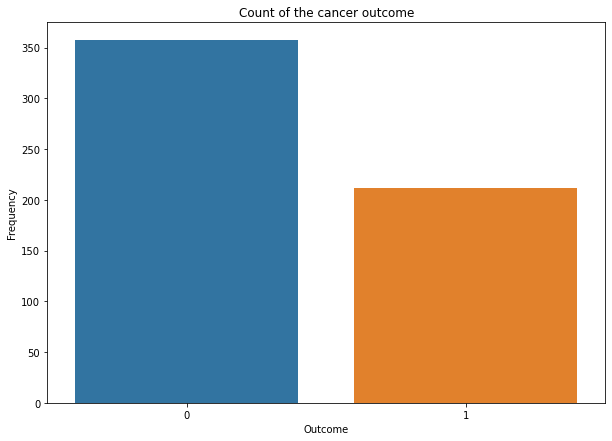

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(bcancer_df["NumericalDiagnosis"])
plt.title("Count of the cancer outcome")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

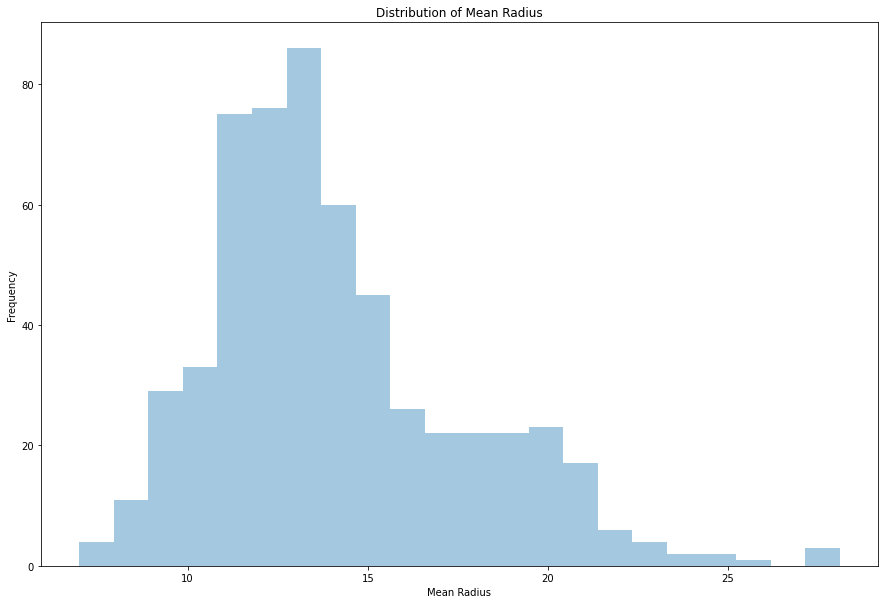

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["radius_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

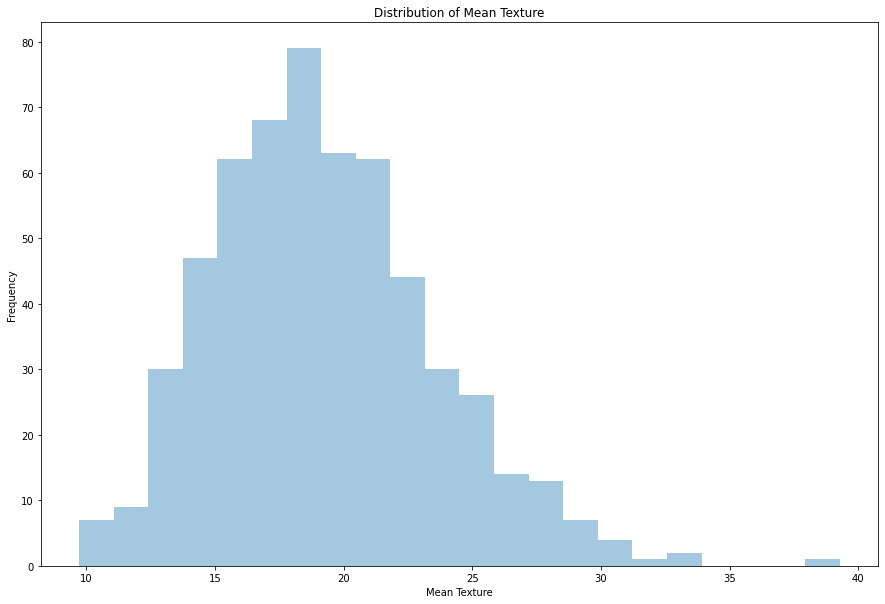

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["texture_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Texture")
plt.xlabel("Mean Texture")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

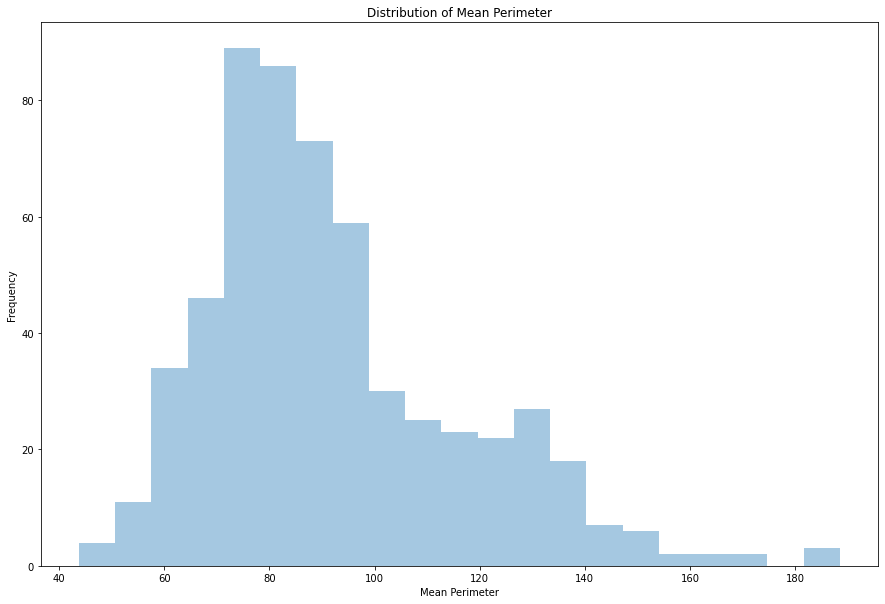

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["perimeter_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Perimeter")
plt.xlabel("Mean Perimeter")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

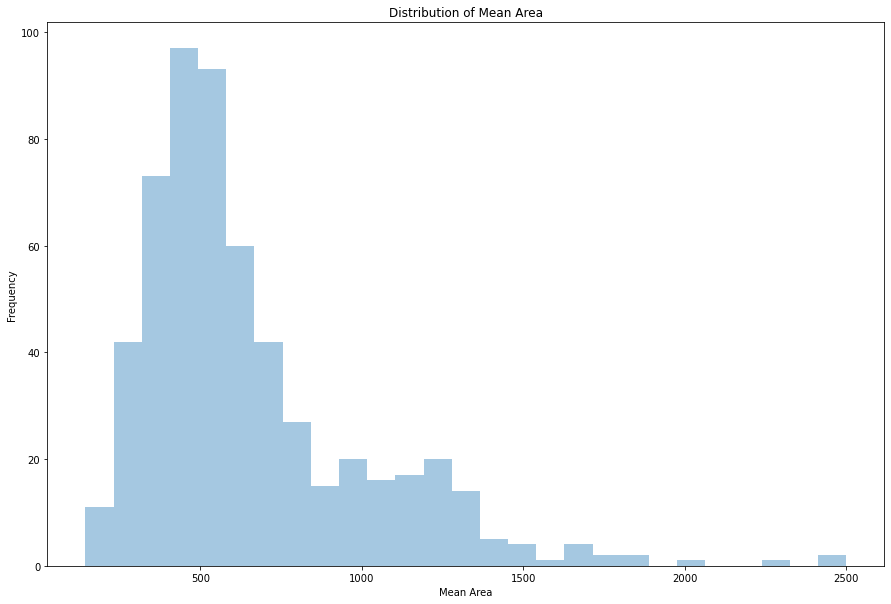

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["area_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Area")
plt.xlabel("Mean Area")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

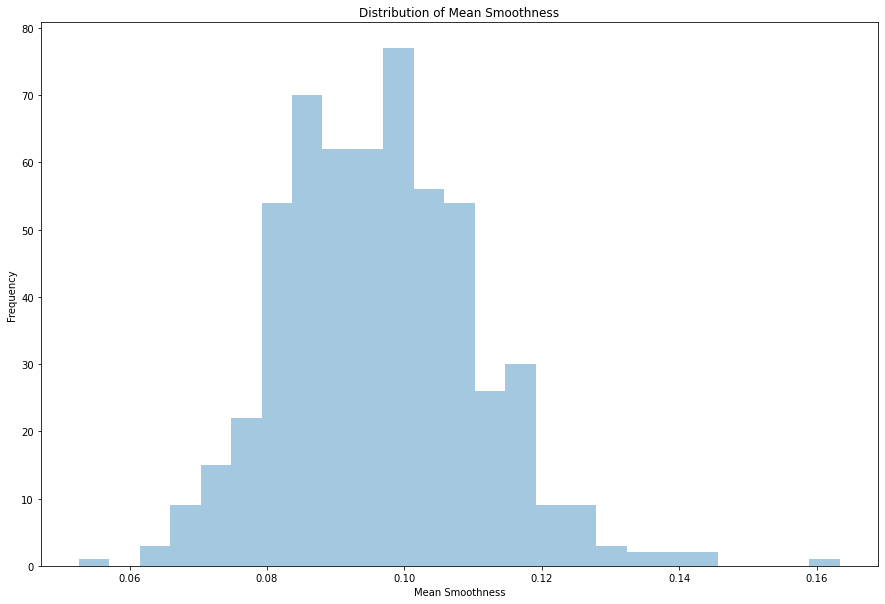

In [26]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["smoothness_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Smoothness")
plt.xlabel("Mean Smoothness")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

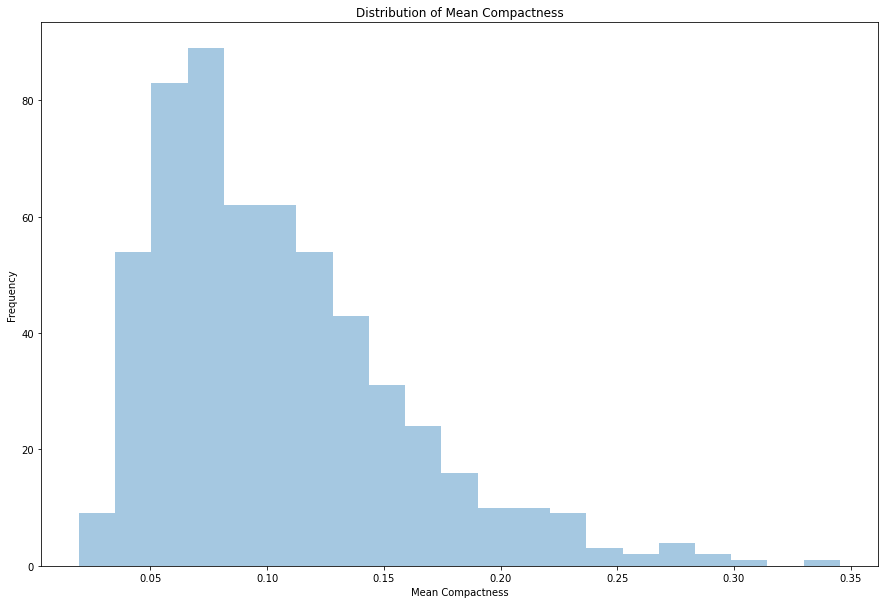

In [27]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["compactness_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Compactness")
plt.xlabel("Mean Compactness")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

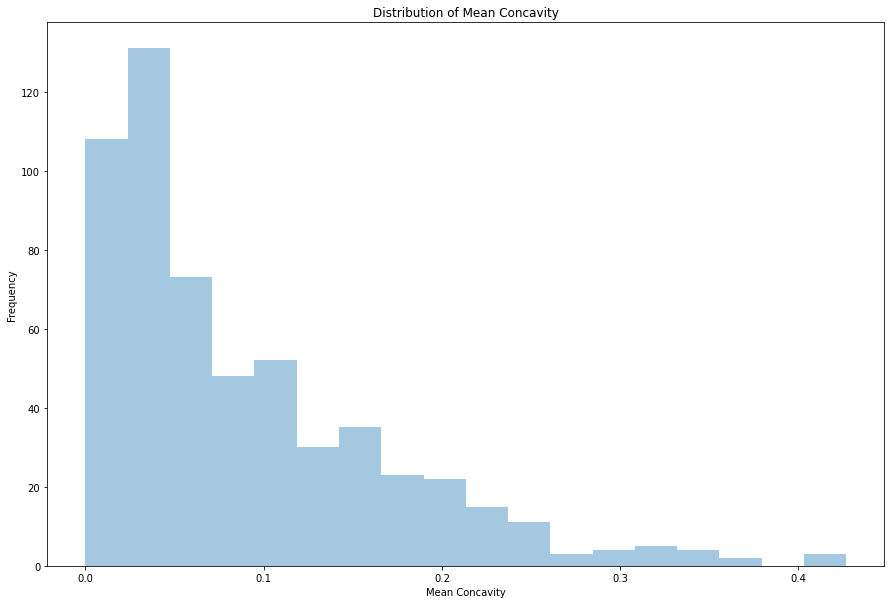

In [28]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["concavity_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Concavity")
plt.xlabel("Mean Concavity")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

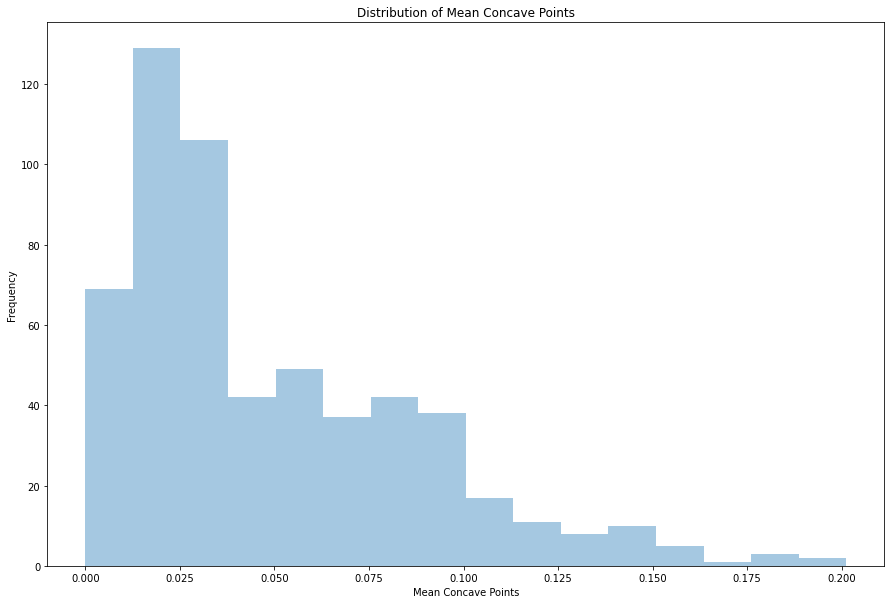

In [29]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["concave points_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Concave Points")
plt.xlabel("Mean Concave Points")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

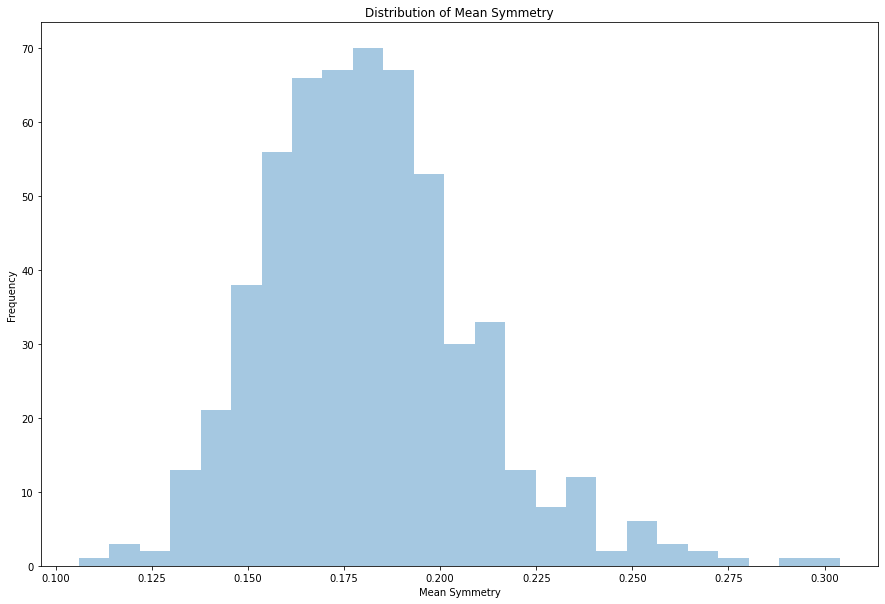

In [30]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["symmetry_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Symmetry")
plt.xlabel("Mean Symmetry")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

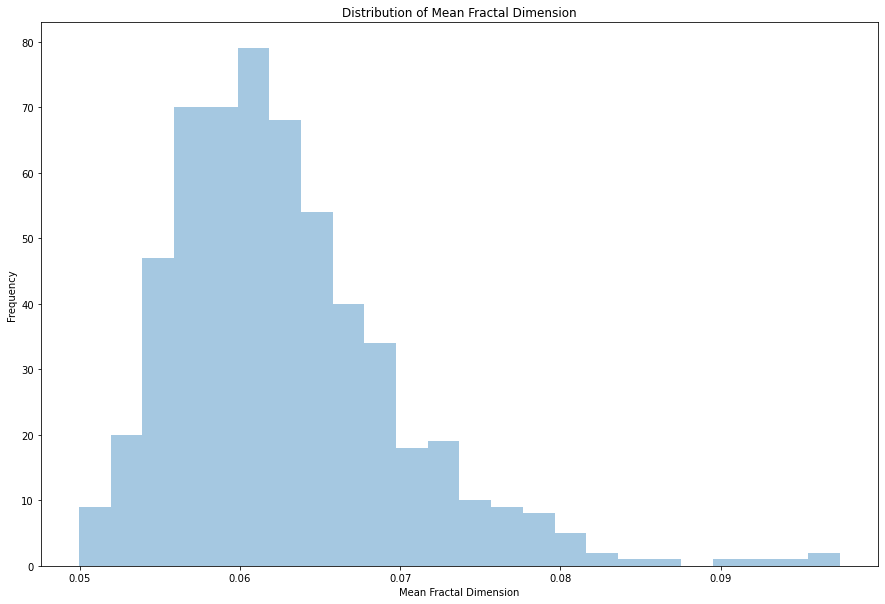

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(bcancer_df["fractal_dimension_mean"], hist=True, kde=False)
plt.title("Distribution of Mean Fractal Dimension")
plt.xlabel("Mean Fractal Dimension")
plt.ylabel("Frequency")

## Data Pre-Processing & Partitioning

In [33]:
scaler = RobustScaler()

In [46]:
bcancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'CategoricalDiagnosis',
       'NumericalDiagnosis'],
      dtype='object')

In [35]:
X = bcancer_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [47]:
y = bcancer_df["NumericalDiagnosis"]

In [37]:
X_scaled = scaler.fit_transform(X)

In [39]:
print(X_scaled[1:5])

[[ 1.76470588 -0.19005329  1.61285862  2.13824503 -0.58795563 -0.21365302
   0.25074155  0.68299497  0.0591716  -0.5783848   0.88965517 -0.58443993
   0.63449457  1.81236284 -0.38797447 -0.38048529 -0.27040059  0.34926471
  -0.58173077  0.14935065  1.73356401 -0.23148148  1.48074594  2.23228416
  -0.25510204 -0.1318395   0.05551416  0.89219446 -0.10666667  0.43549952]
 [ 1.54901961  0.42806394  1.51261666  1.79884106  0.72530375  1.02733659
   1.34328653  1.75824176  0.81952663 -0.18408551  1.70953347 -0.50164037
   1.31239292  2.54206291 -0.07725899  1.01239029  0.46105341  1.3645362
   0.453125    0.5991342   1.48788927  0.01388889  1.32816663  1.79796026
   0.44557823  1.10786868  0.83345753  1.48305173  1.17185185  0.3656644 ]
 [-0.47794118  0.27353464 -0.29934324 -0.45529801  2.46328579  2.92104459
   1.77832707  1.33544422  2.3816568   4.26365796  0.69533469  0.07498828
   0.66133638  0.0987564   0.91703057  2.79452762  1.13946588  1.09445701
   4.91586538  2.60649351 -0.01038062

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [49]:
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [50]:
y.value_counts()

0    357
1    212
Name: NumericalDiagnosis, dtype: int64

In [51]:
y.shape

(569,)

## Building ML Models

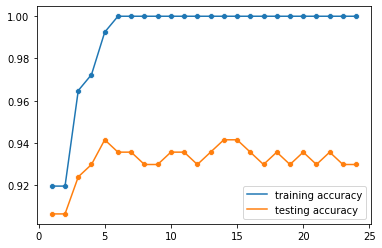

In [52]:
depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
        
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [53]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)

This is the best depth for Decision Tree Classifier:  5 
Accuracy score is:  0.9415204678362573


### HyperParam Tuning of Decision Tree Classifier

In [54]:
dtree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['list', 'dict', 'balanced'],
    'random_state': [3030]
}

grid = GridSearchCV(
                dtree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9400000000000001
best param {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'random_state': 3030, 'splitter': 'random'}


### Comparing the Models

In [56]:
tree.fit(X_train, y_train)
tree_recall = (recall_score(y_test, tree.predict(X_test)))

grid.best_estimator_.fit(X_train, y_train)
grid_recall = (recall_score(y_test, grid.predict(X_test)))

score_list = [tree_recall, grid_recall]
method_name = ['Decision Tree Classifier Before Tuning', 'Decision Tree Classifier After Tuning']
best_summary = pd.DataFrame({
    'Model Version': method_name,
    'score': score_list
})
best_summary

,Model Version,score
0,Decision Tree Classifier Before Tuning,0.951613
1,Decision Tree Classifier After Tuning,0.919355


## Decision Tree Model's Plot

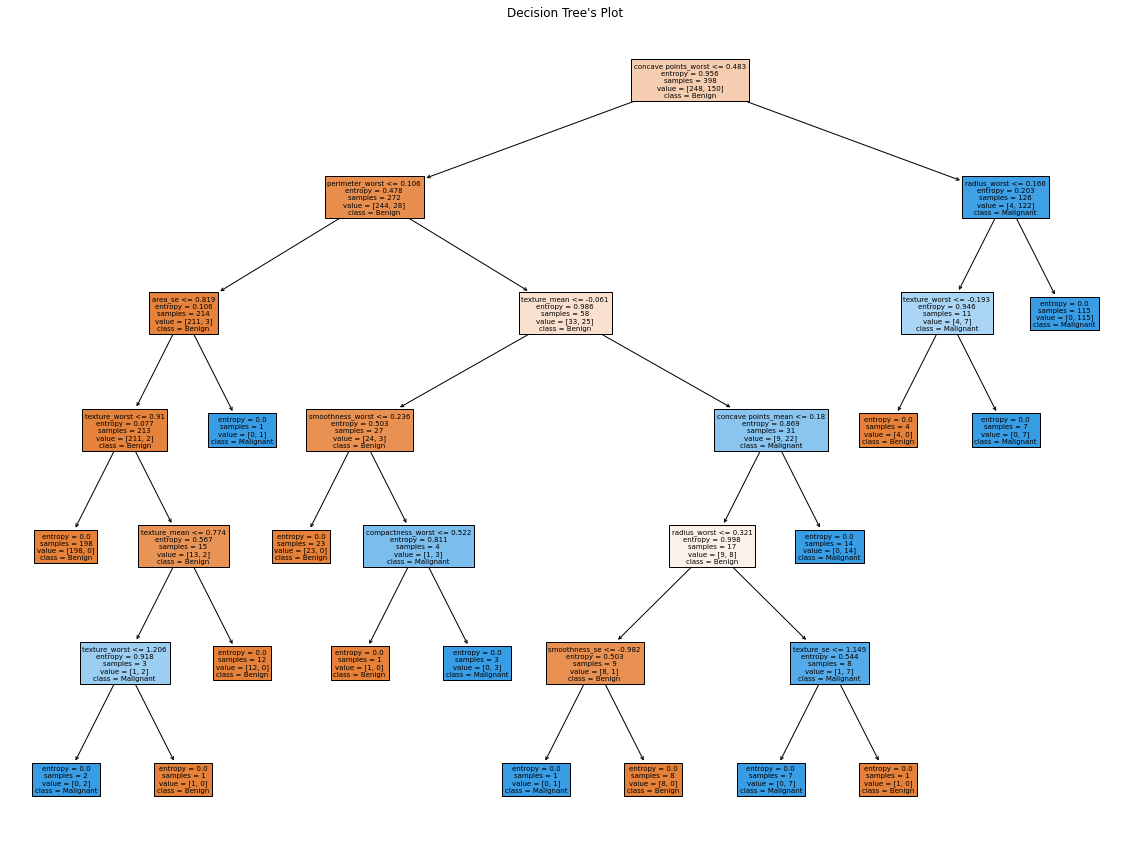

In [61]:
plt.figure(figsize=(20,15))
plot_tree(tree, feature_names = list(X), class_names = ['Benign','Malignant'], filled = True)
plt.title('Decision Tree\'s Plot')
plt.show()

## Feature Importance

In [63]:
dtree_features_imp = pd.DataFrame({
    'Feature Importance': tree.feature_importances_
}, index = X.columns)

dtree_features_imp.sort_values('Feature Importance', ascending = False)

,Feature Importance
concave points_worst,0.590783
perimeter_worst,0.131740
radius_worst,0.061157
texture_mean,0.058918
texture_worst,0.055205
smoothness_worst,0.027189
concave points_mean,0.026250
area_se,0.016892
smoothness_se,0.011906
texture_se,0.011431


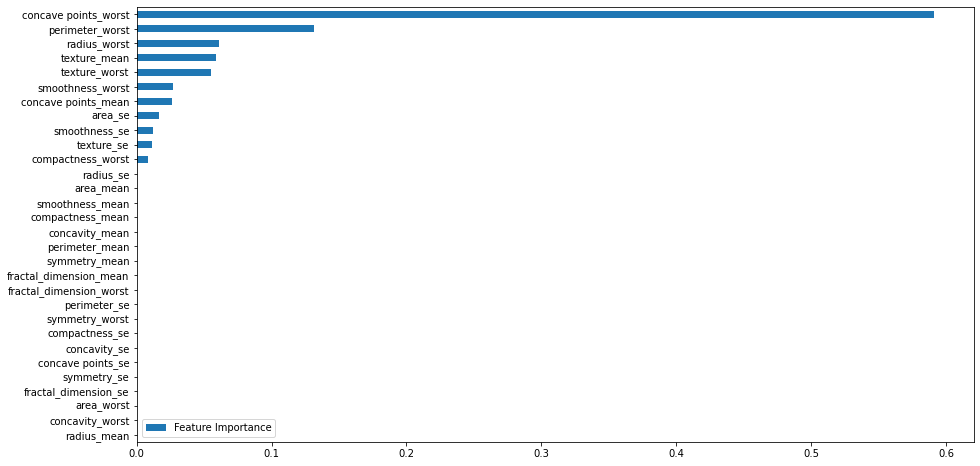

In [65]:
dtree_features_imp.sort_values('Feature Importance', ascending = True).plot(kind = 'barh', figsize = (15,8))

# ~ THE END